In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from matplotlib.pyplot import xticks
# from matplotlib.pyplot import yticks

In [5]:
df = pd.DataFrame(pd.read_csv("Salary Data .csv"))
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [6]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  375
No of cols =  6


In [7]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [8]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
df.columns



Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [12]:
df.shape

(373, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [14]:
# df['Gender'] = df['Gender'].astype('category')
# df.info()
# # Checking Null values
# df.isnull().sum()
# # There are no NULL values in the dataset, hence it is clean.

In [15]:
print(len(set(df['Job Title'])))
print(len(set(df['Gender'])))
print(len(set(df['Education Level'])))

174
2
3


In [16]:
# df = df.dropna()
# EDA

In [17]:
auto=df[['Age', 'Gender', 'Education Level', 'Years of Experience','Salary']]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

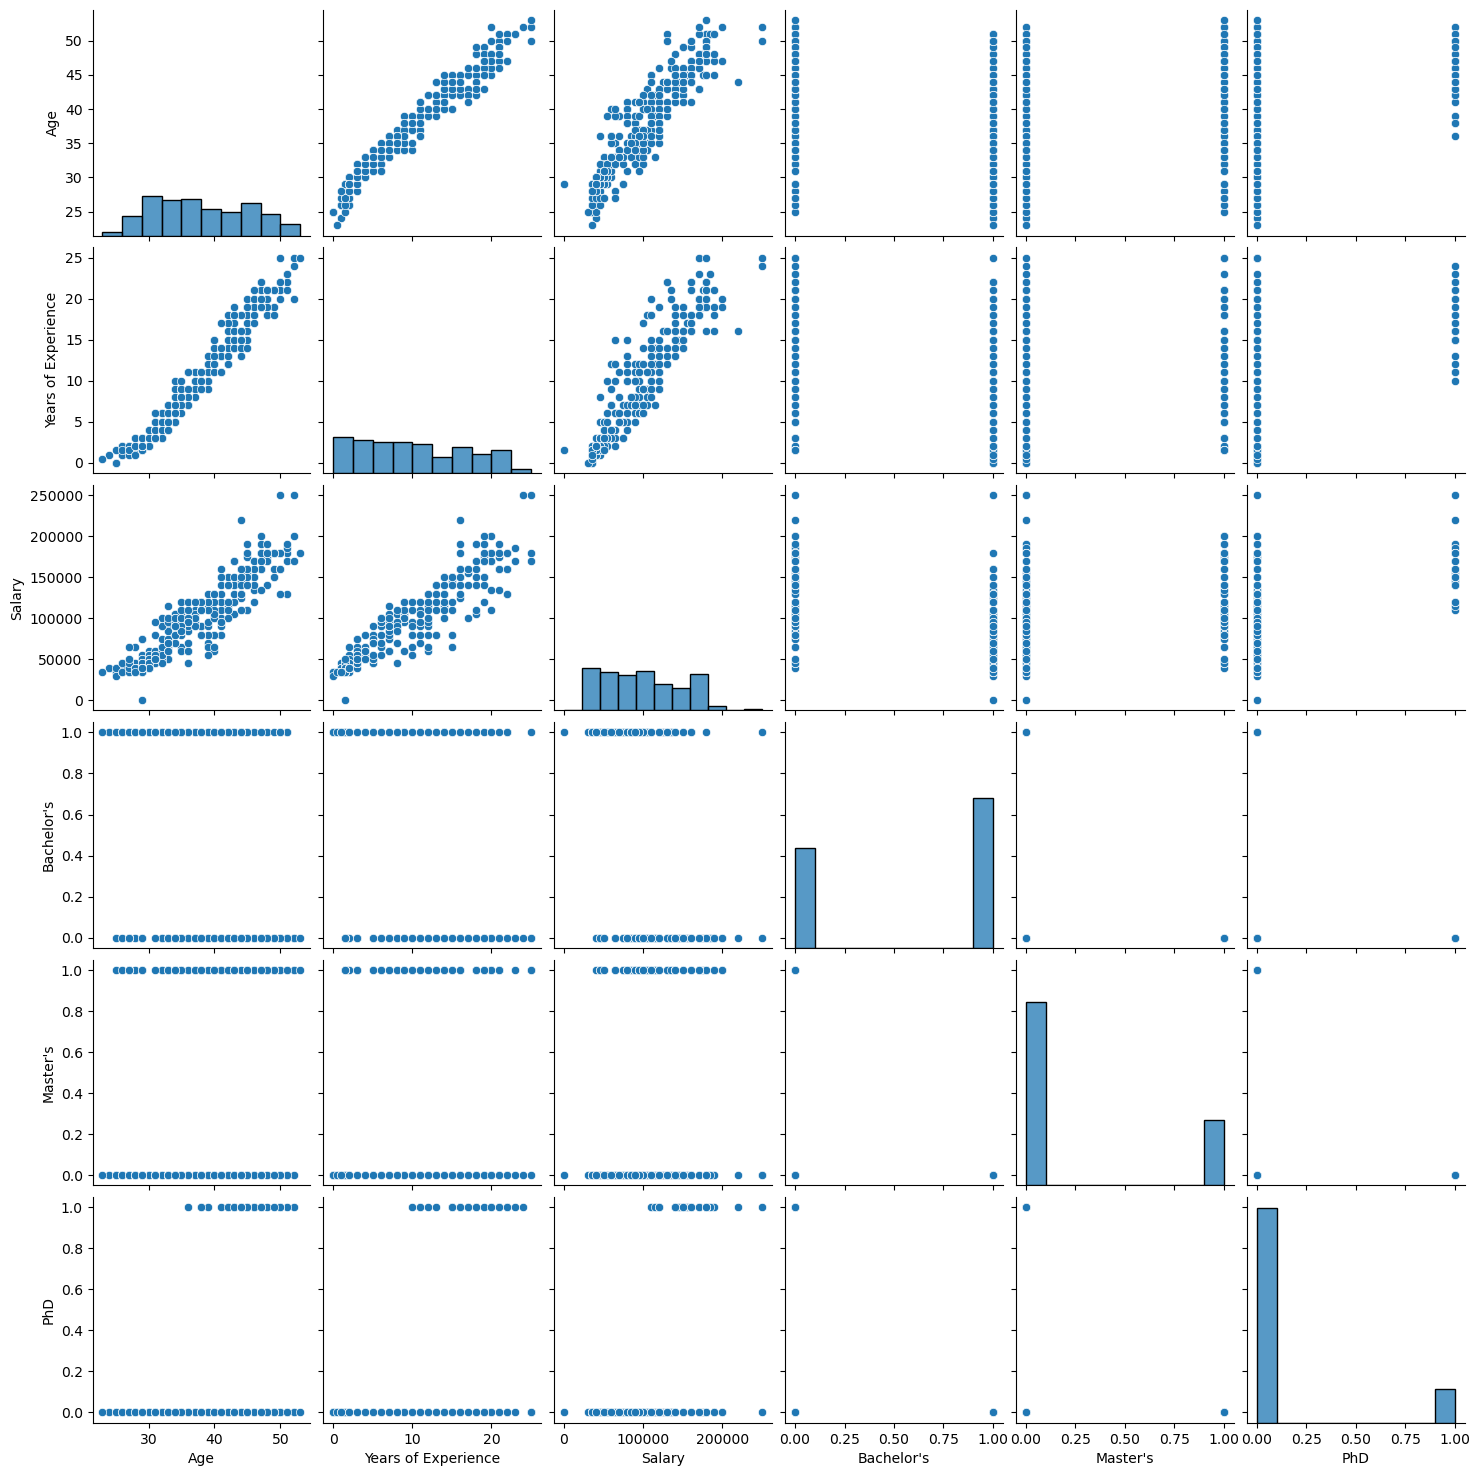

In [49]:
sns.pairplot(auto)

In [19]:
auto1=df[['Age', 'Years of Experience','Salary']]
auto1.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


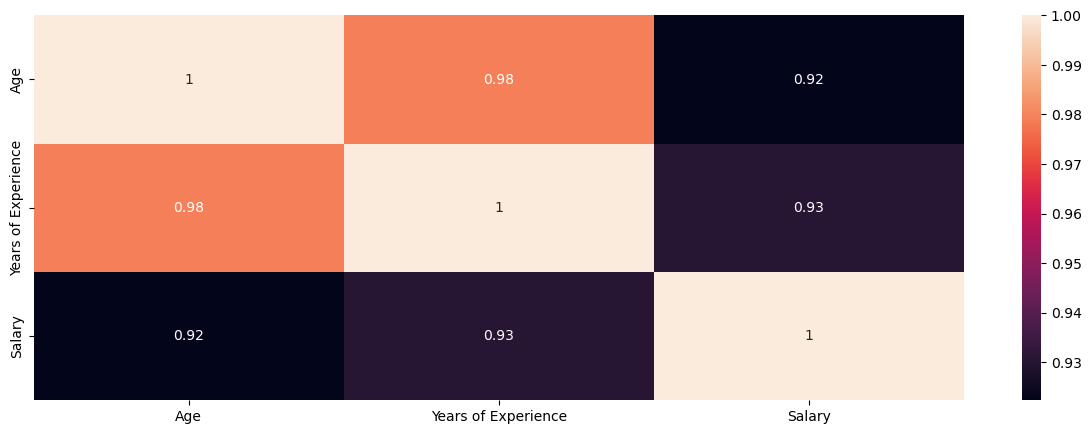

In [50]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()


In [21]:
auto

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0
371,43.0,Male,Master's,19.0,170000.0
372,29.0,Female,Bachelor's,2.0,40000.0
373,34.0,Male,Bachelor's,7.0,90000.0


In [22]:
# Dimension reduction

In [23]:
gender = pd.get_dummies(auto['Gender'], drop_first = True)
gender

,Male
0,True
1,False
2,True
3,False
4,True
...,...
370,False
371,True
372,False
373,True


In [24]:
auto = pd.concat([auto, gender], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male
0,32.0,Male,Bachelor's,5.0,90000.0,True
1,28.0,Female,Master's,3.0,65000.0,False
2,45.0,Male,PhD,15.0,150000.0,True
3,36.0,Female,Bachelor's,7.0,60000.0,False
4,52.0,Male,Master's,20.0,200000.0,True
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,False
371,43.0,Male,Master's,19.0,170000.0,True
372,29.0,Female,Bachelor's,2.0,40000.0,False
373,34.0,Male,Bachelor's,7.0,90000.0,True


In [25]:
education = pd.get_dummies(auto['Education Level'], drop_first = False)
education

,Bachelor's,Master's,PhD
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,True,False
...,...,...,...
370,True,False,False
371,False,True,False
372,True,False,False
373,True,False,False


In [26]:
auto = pd.concat([auto, education], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,Male,Bachelor's,5.0,90000.0,True,True,False,False
1,28.0,Female,Master's,3.0,65000.0,False,False,True,False
2,45.0,Male,PhD,15.0,150000.0,True,False,False,True
3,36.0,Female,Bachelor's,7.0,60000.0,False,True,False,False
4,52.0,Male,Master's,20.0,200000.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,False,True,False,False
371,43.0,Male,Master's,19.0,170000.0,True,False,True,False
372,29.0,Female,Bachelor's,2.0,40000.0,False,True,False,False
373,34.0,Male,Bachelor's,7.0,90000.0,True,True,False,False


In [27]:
# auto=df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
#        'Salary']]

In [28]:
auto = auto.drop(['Gender','Education Level'],axis = 1)
auto

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,True,True,False,False
1,28.0,3.0,65000.0,False,False,True,False
2,45.0,15.0,150000.0,True,False,False,True
3,36.0,7.0,60000.0,False,True,False,False
4,52.0,20.0,200000.0,True,False,True,False
...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,False,True,False,False
371,43.0,19.0,170000.0,True,False,True,False
372,29.0,2.0,40000.0,False,True,False,False
373,34.0,7.0,90000.0,True,True,False,False


In [29]:
auto.corr()

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
Age,1.000000,0.979128,0.922335,-0.020324,-0.541733,0.281897,0.411183
Years of Experience,0.979128,1.000000,0.930338,0.002884,-0.573775,0.306961,0.424752
Salary,0.922335,0.930338,1.000000,0.071106,-0.657181,0.362061,0.473073
Male,-0.020324,0.002884,0.071106,1.000000,0.049259,-0.036219,-0.023827
Bachelor's,-0.541733,-0.573775,-0.657181,0.049259,1.000000,-0.731944,-0.487964
Master's,0.281897,0.306961,0.362061,-0.036219,-0.731944,1.000000,-0.237577
PhD,0.411183,0.424752,0.473073,-0.023827,-0.487964,-0.237577,1.000000


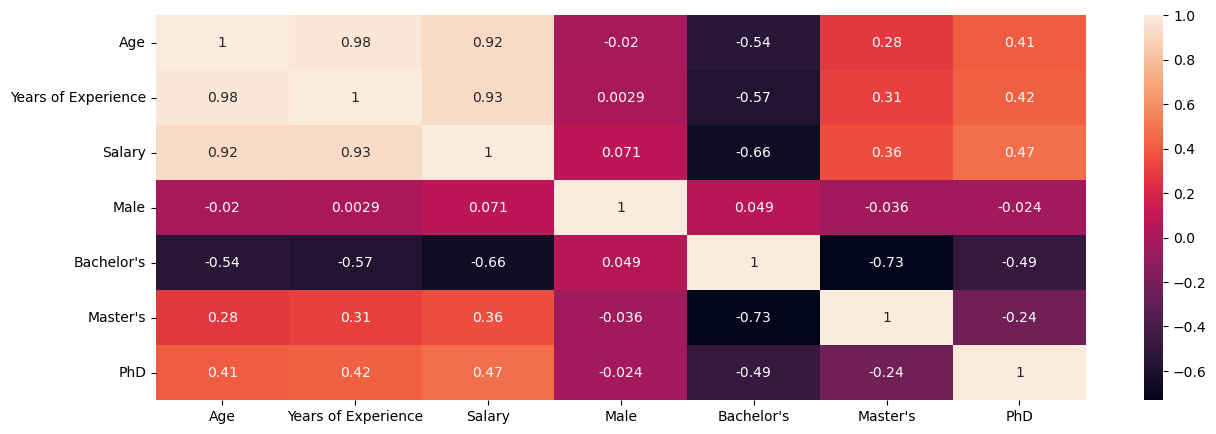

In [30]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [31]:
auto = auto.drop(['Male'],axis = 1)
auto

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,True,False,False
1,28.0,3.0,65000.0,False,True,False
2,45.0,15.0,150000.0,False,False,True
3,36.0,7.0,60000.0,True,False,False
4,52.0,20.0,200000.0,False,True,False
...,...,...,...,...,...,...
370,35.0,8.0,85000.0,True,False,False
371,43.0,19.0,170000.0,False,True,False
372,29.0,2.0,40000.0,True,False,False
373,34.0,7.0,90000.0,True,False,False


In [32]:
# auto['Salary'] = auto['Salary'].astype('int')

In [33]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [34]:
df_train.shape

(317, 6)

In [35]:
df_test.shape

(56, 6)

In [36]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['Age','Years of Experience',"Bachelor's",
                    "Master's","PhD"]]

y_train = df_train['Salary'].astype('int')
# df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# # #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# model.predict(df_test_predict)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearRegression()

In [37]:
# #Creating pickle file
import pickle
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [38]:
#training acc
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)



Linear regression =  89.00649825144669
Logistic regression =  31.230283911671926
Polynomial regression =  93.9967685285314


In [39]:
X_test = df_test
y_test = auto['Salary'].astype('int')
X_test = auto.drop(['Salary'],axis = 1)

In [40]:
X_test

,Age,Years of Experience,Bachelor's,Master's,PhD
0,32.0,5.0,True,False,False
1,28.0,3.0,False,True,False
2,45.0,15.0,False,False,True
3,36.0,7.0,True,False,False
4,52.0,20.0,False,True,False
...,...,...,...,...,...
370,35.0,8.0,True,False,False
371,43.0,19.0,False,True,False
372,29.0,2.0,True,False,False
373,34.0,7.0,True,False,False


In [41]:
y_test

0       90000
1       65000
2      150000
3       60000
4      200000
        ...  
370     85000
371    170000
372     40000
373     90000
374    150000
Name: Salary, Length: 373, dtype: int32

In [42]:
#test acc
print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  89.50630180436157
Logistic regression =  30.02680965147453
Polynomial regression =  -1320.7574760522357


In [43]:
data = df_test.iloc[21:22].astype('int')
data

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
192,30,3,45000,1,0,0


In [44]:
actual_salary = data['Salary']
data = data.drop(['Salary'],axis = 1)
data

,Age,Years of Experience,Bachelor's,Master's,PhD
192,30,3,1,0,0


In [45]:
print("Predicted Salary using linear regression",lr_model.predict(data))
print("Predicted Salary using logistic regression",lg_model.predict(data))
print("Predicted Salary using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))

print("Actual Salary",actual_salary)

Predicted Salary using linear regression [51449.41847194]
Predicted Salary using logistic regression [40000]
Predicted Salary using Polynomial regression [50267.08160919]
Actual Salary 192    45000
Name: Salary, dtype: int32


In [46]:
actual_salary

192    45000
Name: Salary, dtype: int32

In [47]:
data = {'Age':[int(input("Enter age = ")) for i in range(1)],
        'Years of Experience':[float(input("Enter Exp = ")) for i in range(1)],
        "Bachelor's":[int(input("Bachelors's degree ? Enter 1 or 0 = ")) for i in range(1)],
        "Master's":[int(input("Master's degree ? Enter 1 or 0 = ")) for i in range(1)],
         "PhD":[int(input("Phd degree ? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)

df

Enter age = 47
Enter Exp = 7
Bachelors's degree ? Enter 1 or 0 = 1
Master's degree ? Enter 1 or 0 = 1
Phd degree ? Enter 1 or 0 = 1


,Age,Years of Experience,Bachelor's,Master's,PhD
0,47,7.0,1,1,1


In [48]:
# predicted_salary = lr_model.predict(poly_reg.fit_transform(df))
predicted_salary = lr_model.predict(df)

print("predicted Salary",predicted_salary)

predicted Salary [121065.19657386]


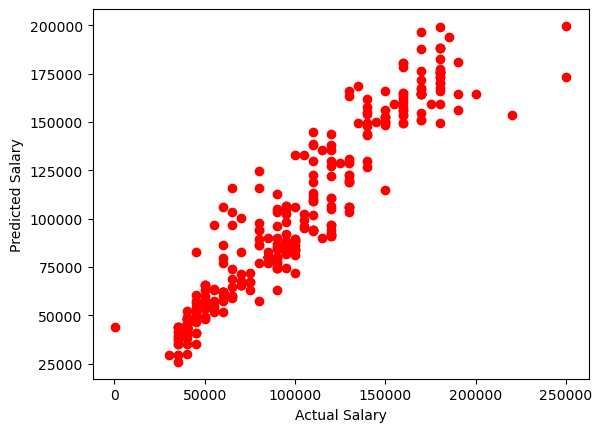

In [51]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

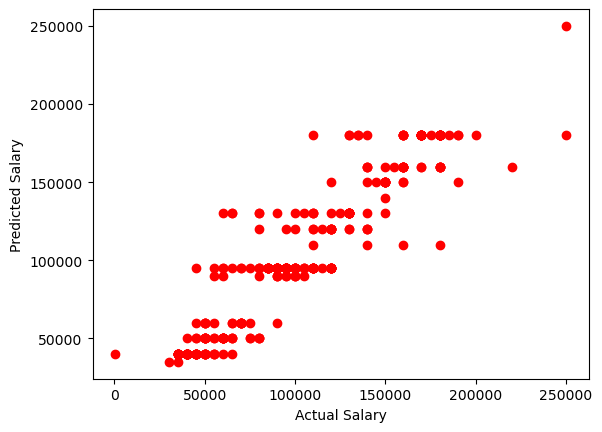

In [52]:
plt.scatter(y_train,lg_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

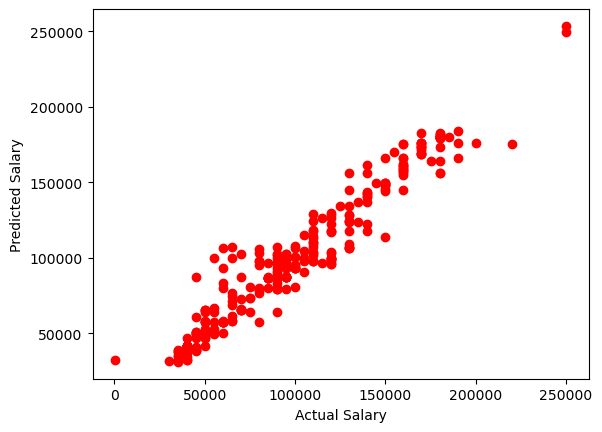

In [53]:
plt.scatter(y_train,pol_reg.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [54]:
import pickle as pk
#to save model
filename = 'model.pickle'
pk.dump(lr_model, open(filename, 'wb'))

In [55]:
import pickle as pk
import pandas as pd
#to save model
filename = 'model.pickle'
#load the model
loaded_model = pk.load(open(filename, 'rb'))
# print("Polynomial regression = ",loaded_model.score(poly_reg.fit_transform(X_train), y_train)*100)

data = {'Age':[int(input("Enter age = ")) for i in range(1)],
        'Years of Experience':[float(input("Enter Exp = ")) for i in range(1)],
        "Bachelor's":[int(input("Bachelors's degree ? Enter 1 or 0 = ")) for i in range(1)],
        "Master's":[int(input("Master's degree ? Enter 1 or 0 = ")) for i in range(1)],
         "PhD":[int(input("Phd degree ? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)
predicted_salary = loaded_model.predict(df)
print("predicted Salary",predicted_salary)
df

Enter age = 47
Enter Exp = 7
Bachelors's degree ? Enter 1 or 0 = 1
Master's degree ? Enter 1 or 0 = 1
Phd degree ? Enter 1 or 0 = 1
predicted Salary [121065.19657386]


,Age,Years of Experience,Bachelor's,Master's,PhD
0,47,7.0,1,1,1
